In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('../RawLidarData/Veteran/OutputFile/OutputTrajs/')

In [3]:
Trajs = pd.read_csv('Trajctories.csv')

In [4]:
Traj_set = []
for traj in Trajs.groupby('ObjectID'):
    Traj_set.append(traj[1])


In [5]:
Traj_coords = []
Traj_len = []
Traj_v = []
for traj in Traj_set:
    coord = np.array(traj.loc[:,['Coord_X_est','Coord_Y_est']])
    if len(coord) == 0:
        continue
    velocity = np.array(traj.loc[:,'Speed_est'])
    Traj_len.append(len(coord))
    Traj_coords.append(coord)
    Traj_v.append(velocity)

In [6]:
total_v = np.concatenate(Traj_v)

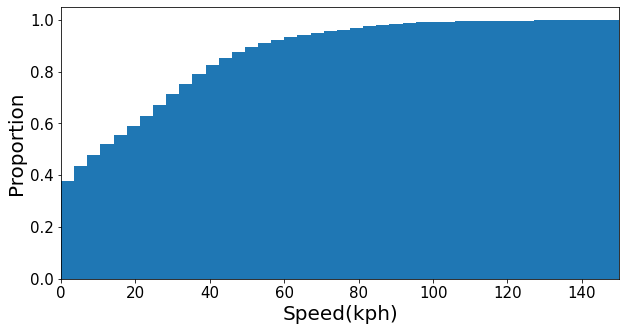

In [7]:
plt.figure(figsize=(10,5))
plt.hist(total_v,density=True,cumulative=True,bins=100)
plt.xlim(0,150)
plt.xlabel('Speed(kph)',fontsize = 20)
plt.ylabel('Proportion',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('../../../../Presentation/FIG/PORTION.png',dpi = 600)
plt.show()

In [9]:
np.random.seed(412)
random_id = np.random.choice(np.arange(len(Traj_v)),800,replace=False)

In [17]:
from dtaidistance.dtw_ndim import distance_fast
from tqdm import tqdm

In [18]:
dis_mat = np.zeros((len(Traj_coords),len(Traj_coords)))
for i in tqdm(range(dis_mat.shape[0])):
    # print(i)
    for j in range(dis_mat.shape[0]):
        if i<j:
            dis_mat[i,j] = distance_fast(Traj_coords[i],Traj_coords[j])
np.save('dis_mat.npy',dis_mat)

100%|██████████| 1866/1866 [01:37<00:00, 19.12it/s] 


In [21]:
dis_mat = dis_mat + dis_mat.T

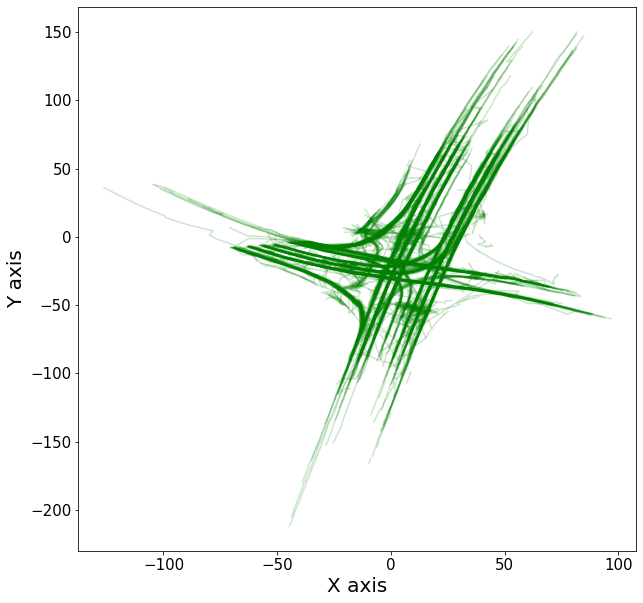

In [105]:
plt.figure(figsize=(10,10))
for traj in Traj_coords:
    plt.plot(traj[:,0],traj[:,1],c = 'g',alpha = 0.2)
plt.xlabel('X axis',fontsize = 20)
plt.ylabel('Y axis',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('../../../../Presentation/FIG/RESULT.png',dpi = 600)
plt.show()

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
db = DBSCAN(eps = 100,min_samples=5,metric='precomputed')

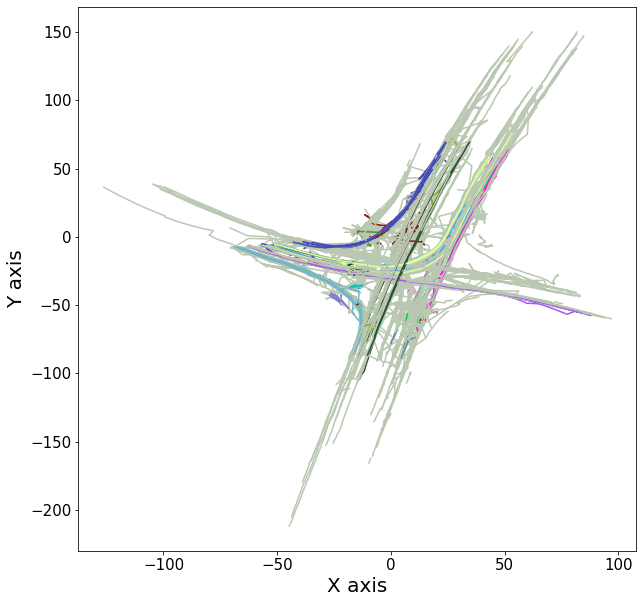

In [170]:
plt.figure(figsize=(10,10))
for i,traj in enumerate(Traj_coords):
    plt.plot(traj[:,0],traj[:,1],c = color_map[labels[i]])
plt.xlabel('X axis',fontsize = 20)
plt.ylabel('Y axis',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.savefig('../../../../Presentation/FIG/RESULT.png',dpi = 600)
plt.show()